In [43]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
#import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [2]:
train_data=pd.read_csv("D:/intern/task 1/train.csv")
test_data=pd.read_csv("D:/intern/task 1/test.csv")

In [3]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

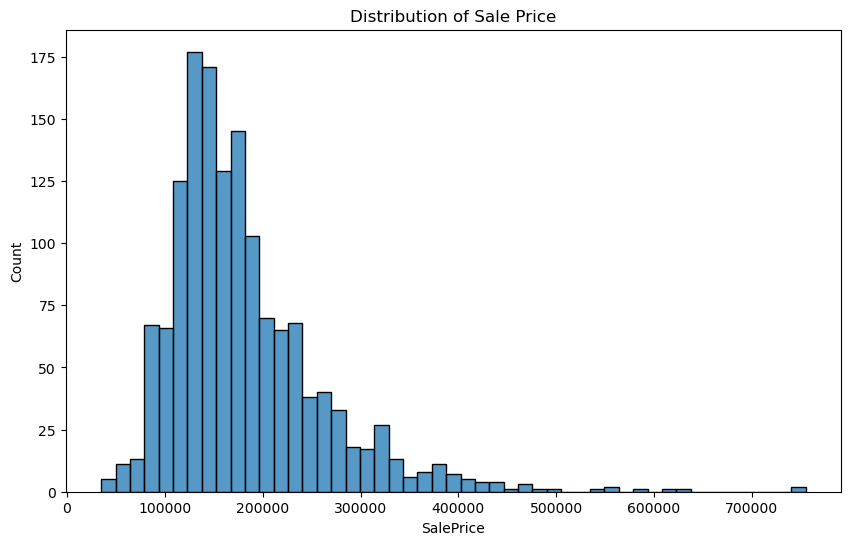

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(x='SalePrice', data=train_data)
plt.title('Distribution of Sale Price')
plt.show()

C:\Users\menna\AppData\Local\Temp\ipykernel_15344\2241300693.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col_plot , fit=stats.norm ,ax=axes[0,0])
C:\Users\menna\AppData\Local\Temp\ipykernel_15344\2241300693.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(col_plot) ,fit=stats.n

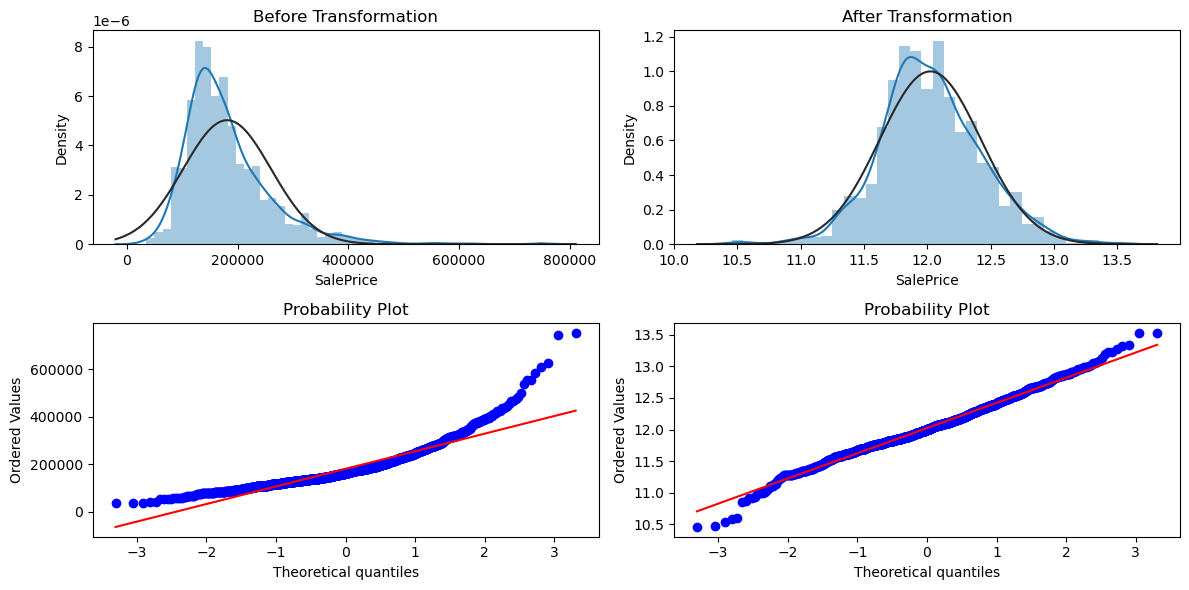

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))
col_plot=train_data['SalePrice']
axes[0,0].set_title('Before Transformation')
sns.distplot(col_plot , fit=stats.norm ,ax=axes[0,0])
stats.probplot(col_plot,plot=axes[1,0])
axes[0,1].set_title('After Transformation')
sns.distplot(np.log(col_plot) ,fit=stats.norm,ax=axes[0,1])
stats.probplot(np.log(col_plot),plot=axes[1,1])
plt.tight_layout()
#to ensure that the subplots fit within the figure area without overlapping

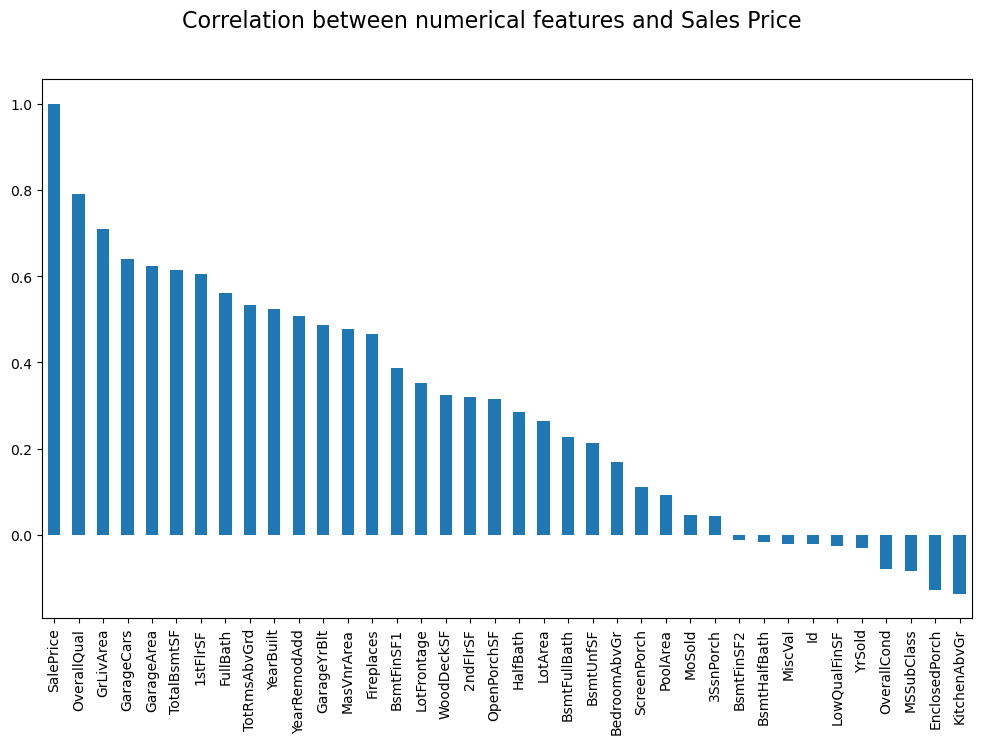

In [7]:
correlation =train_data.select_dtypes(include=[np.number]).corr()['SalePrice']
correlation=correlation.sort_values(ascending=False)
plt.figure(figsize=(12,7))
correlation.plot(kind='bar')
plt.suptitle('Correlation between numerical features and Sales Price', fontsize=16)
plt.show()

In [8]:
object_data=train_data.select_dtypes(exclude='number').columns

In [9]:
object_data

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
train_data=pd.DataFrame(train_data)
train_data=pd.get_dummies(train_data,columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

In [11]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


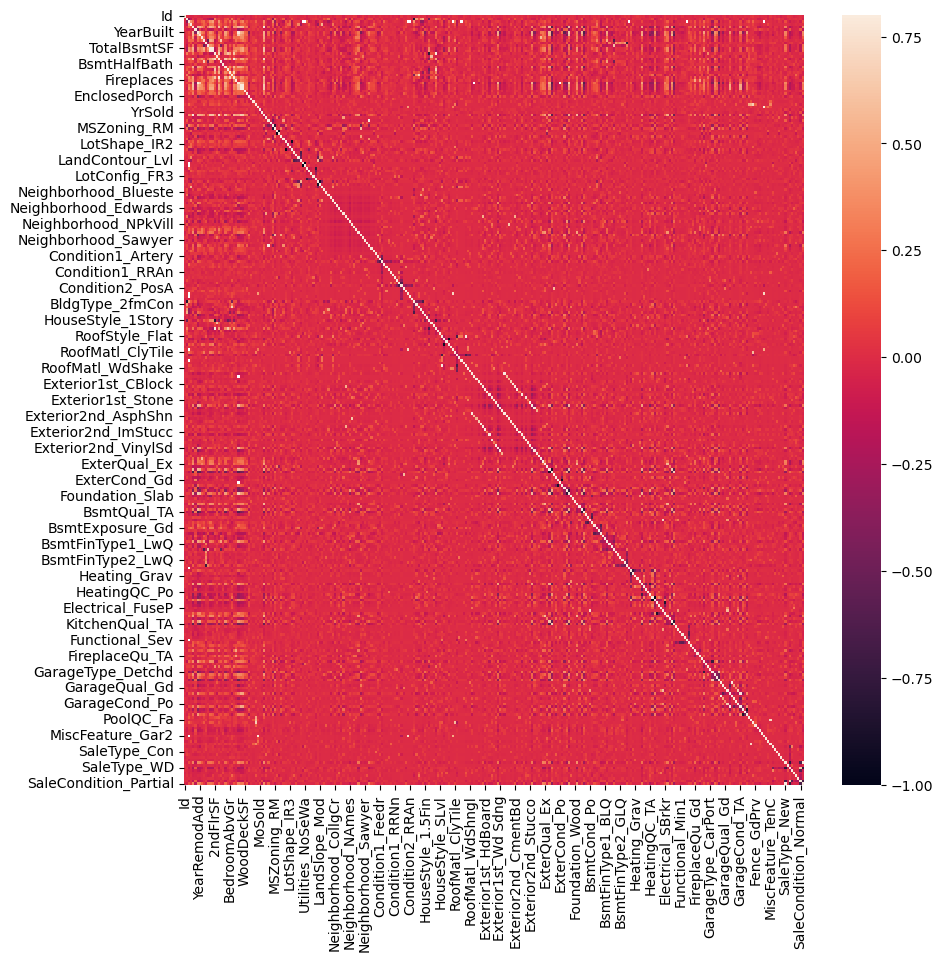

In [12]:
corr = train_data.corr()
f = ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8)

plt.show()  


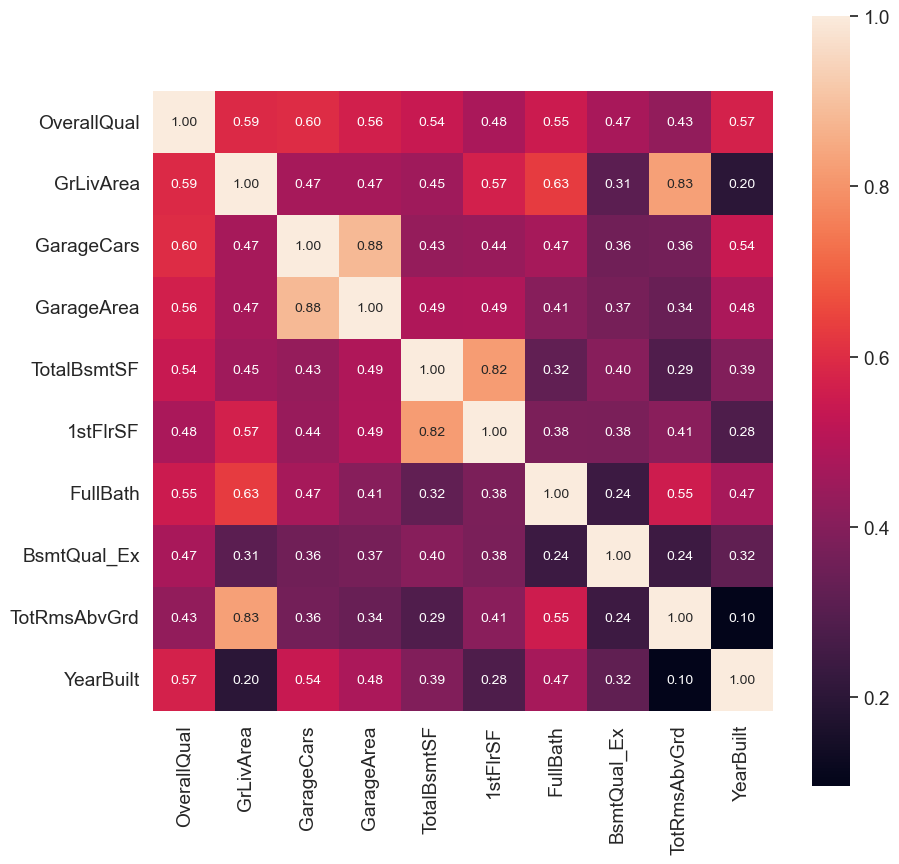

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

# Assuming 'train_data' is your DataFrame and 'SalePrice' is the target variable
columns = train_data.corr().nlargest(11, 'SalePrice')['SalePrice'].index
selected_columns = columns[1:]  # Exclude the target variable

# Extract the selected columns from the DataFrame
selected_data = train_data[selected_columns]

# Calculate the correlation matrix
corr_matrix = selected_data.corr()

sns.set(font_scale=1.25)
heat_map = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f',
                       annot_kws={'size': 10}, yticklabels=selected_columns.values,
                       xticklabels=selected_columns.values)
plt.show()


Text(0.5, 1.0, 'corr:0.88')

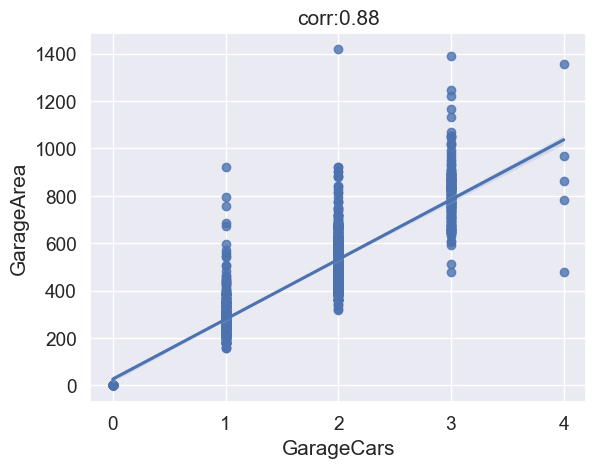

In [14]:
# scatterplot with GarageCars, GarageArea
fig = plt.figure()
ax = sns.regplot(x=train_data['GarageCars'], y=train_data['GarageArea'])
plt.title('corr:0.88')

Text(0.5, 1.0, 'corr:0.83')

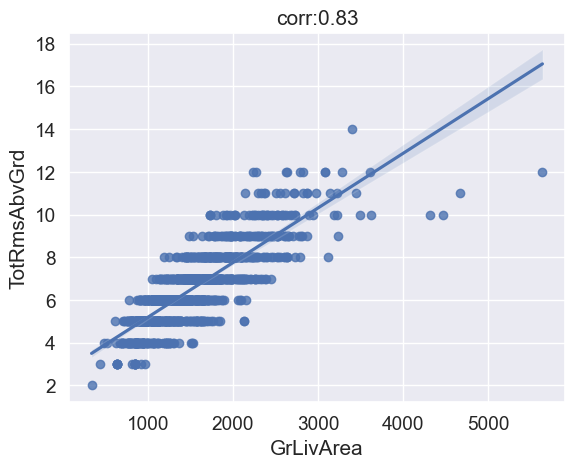

In [15]:
# scatterplot with GrLivArea, TotRmsAbvGrd
fig = plt.figure()
ax = sns.regplot(x=train_data['GrLivArea'], y=train_data['TotRmsAbvGrd'])
plt.title('corr:0.83')

Text(0.5, 1.0, 'corr:0.82')

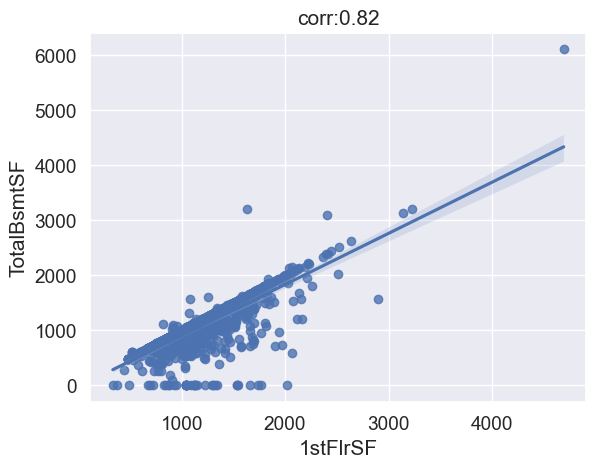

In [16]:
# scatterplot with 1stFlrSF, TotalVsmtSF
fig = plt.figure()
ax = sns.regplot(x=train_data['1stFlrSF'], y=train_data['TotalBsmtSF'])
plt.title('corr:0.82')

In [17]:
def find_nan_cols(df):
    null = df.isnull().sum()
    missing_df = pd.concat([null], axis=1, keys=['nancounts'])
    
    return missing_df.loc[missing_df['nancounts'] > 0]

In [18]:
find_nan_cols(train_data)

,nancounts
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


In [19]:
find_nan_cols(test_data)

,nancounts
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [20]:
train_data=train_data.fillna(method='pad')
test_data=test_data.fillna(method='pad')

In [21]:
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())

0
554


In [22]:
test_null=find_nan_cols(test_data)
print(test_null)

             nancounts
Alley               36
MasVnrType           1
FireplaceQu          2
PoolQC             514
MiscFeature          1


In [23]:
#so i will drop this columns in test data
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType'],axis=1,inplace=True)

In [24]:
print('Nan counts in train_data:',train_data.isnull().sum().sum())
print('Nan counts in test_data:',test_data.isnull().sum().sum())

Nan counts in train_data: 0
Nan counts in test_data: 0


In [25]:
train_data.shape

(1460, 289)

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [27]:
print('origint_train_df.shape()', train_data.shape)
train_data_ohe = pd.get_dummies(train_data)
print('train_data_ohe.shape()', train_data_ohe.shape)
train_data_ohe.head()

origint_train_df.shape() (1460, 289)
train_data_ohe.shape() (1460, 289)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [28]:

train_sm=sm.add_constant(train_data_ohe, has_constant='add')
train_sm.head()

,const,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,1,60,65.0,8450,7,5,2003,2003,196.0,...,False,False,False,True,False,False,False,False,True,False
1,1.0,2,20,80.0,9600,6,8,1976,1976,0.0,...,False,False,False,True,False,False,False,False,True,False
2,1.0,3,60,68.0,11250,7,5,2001,2002,162.0,...,False,False,False,True,False,False,False,False,True,False
3,1.0,4,70,60.0,9550,7,5,1915,1970,0.0,...,False,False,False,True,True,False,False,False,False,False
4,1.0,5,60,84.0,14260,8,5,2000,2000,350.0,...,False,False,False,True,False,False,False,False,True,False


In [29]:
feature_columns=list(train_sm.columns.difference(['SalePrice']))
x=train_sm[feature_columns]
y=train_sm['SalePrice']

In [30]:
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
#model
model = sm.OLS(y_train,x_train.astype(float))
#fit
fitted_model =model.fit()

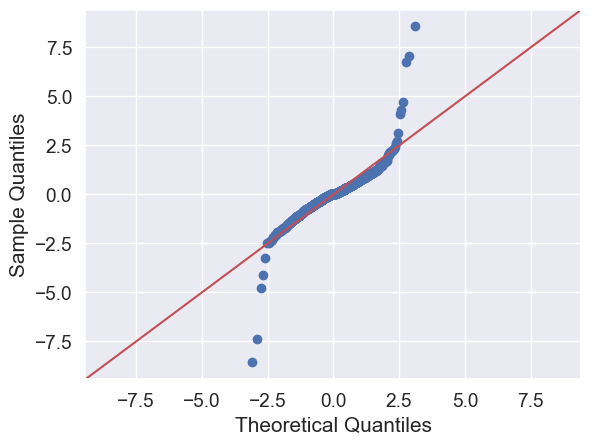

In [32]:
residuals=fitted_model.resid

fig=sm.qqplot(residuals,fit=True,line='45')

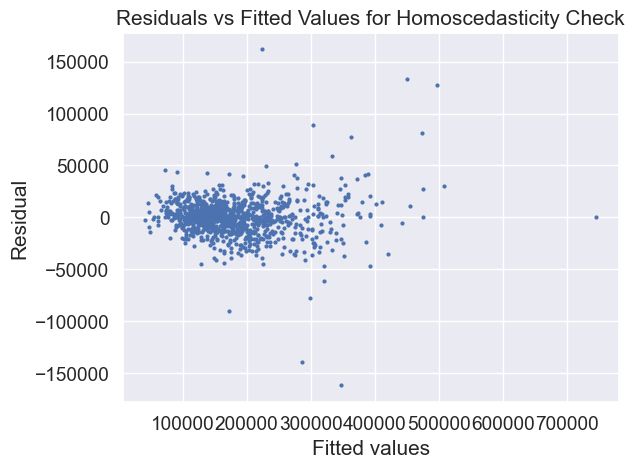

In [33]:
y_pred = fitted_model.predict(sm.add_constant(x_train.astype(float)))

# Calculate residuals

# Scatter plot for homoscedasticity check
fig = plt.scatter(y_pred, residuals, s=4)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.title('Residuals vs Fitted Values for Homoscedasticity Check')
plt.show()

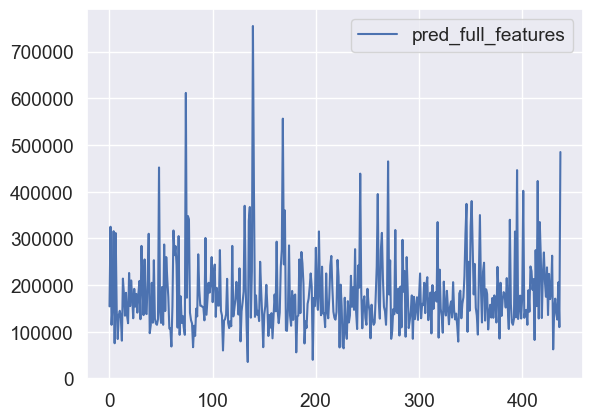

In [34]:
y_pred2=fitted_model.predict(sm.add_constant(x_test.astype(float)))
plt.plot(np.array(y_test,y_pred2),label='pred_full_features')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error
#mse
mse=mean_squared_error(y_test,y_pred2)
#rmse
rmse=np.sqrt(mse)
print('mse :',mse)
print('rmse :',rmse)

mse : 17610066675.51798
rmse : 132702.92640148514


In [38]:
r2 = r2_score(y_test, y_pred2)
print(r2)

-1.523621389854688


In [39]:
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [44]:
model_dict = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Machine Regression': SVR(),
    'XGBoost Regression': xgb.XGBRegressor(),
    'GB Regressor': GradientBoostingRegressor(),
    'catboost':CatBoostRegressor()
    
}
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in model_dict.items()}

rmse_results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_results[name] = rmse
rmse_results_sorted = dict(sorted(rmse_results.items(), key=lambda item: item[1]))
print(rmse_results_sorted)

Learning rate set to 0.041084
0:	learn: 75684.9660856	total: 4.2ms	remaining: 4.2s
1:	learn: 73834.7224500	total: 7.28ms	remaining: 3.63s
2:	learn: 72009.5935340	total: 10.2ms	remaining: 3.38s
3:	learn: 70450.4401203	total: 13.3ms	remaining: 3.31s
4:	learn: 68851.5979306	total: 16.8ms	remaining: 3.34s
5:	learn: 67165.8921725	total: 19.8ms	remaining: 3.27s
6:	learn: 65648.8943080	total: 22.6ms	remaining: 3.21s
7:	learn: 64193.2157704	total: 25.5ms	remaining: 3.16s
8:	learn: 62802.2032958	total: 28.5ms	remaining: 3.14s
9:	learn: 61427.0173440	total: 31.7ms	remaining: 3.14s
10:	learn: 60141.2392944	total: 35ms	remaining: 3.15s
11:	learn: 58864.1731068	total: 37.9ms	remaining: 3.12s
12:	learn: 57699.1870070	total: 41.5ms	remaining: 3.15s
13:	learn: 56582.1364693	total: 44.5ms	remaining: 3.13s
14:	learn: 55441.6083055	total: 47.8ms	remaining: 3.14s
15:	learn: 54356.5953225	total: 50.9ms	remaining: 3.13s
16:	learn: 53247.5461367	total: 53.9ms	remaining: 3.12s
17:	learn: 52133.1972839	total: 

167:	learn: 19037.3364810	total: 563ms	remaining: 2.79s
168:	learn: 18993.8663167	total: 567ms	remaining: 2.79s
169:	learn: 18972.2819156	total: 570ms	remaining: 2.78s
170:	learn: 18930.7251742	total: 574ms	remaining: 2.78s
171:	learn: 18872.9309210	total: 577ms	remaining: 2.78s
172:	learn: 18841.2350222	total: 581ms	remaining: 2.77s
173:	learn: 18826.2534876	total: 585ms	remaining: 2.77s
174:	learn: 18783.7385676	total: 589ms	remaining: 2.78s
175:	learn: 18727.6912426	total: 592ms	remaining: 2.77s
176:	learn: 18690.7265314	total: 595ms	remaining: 2.77s
177:	learn: 18636.3340360	total: 599ms	remaining: 2.76s
178:	learn: 18580.8923621	total: 602ms	remaining: 2.76s
179:	learn: 18543.6828324	total: 604ms	remaining: 2.75s
180:	learn: 18520.9567600	total: 607ms	remaining: 2.75s
181:	learn: 18490.2689601	total: 610ms	remaining: 2.74s
182:	learn: 18453.9998208	total: 614ms	remaining: 2.74s
183:	learn: 18442.9063327	total: 616ms	remaining: 2.73s
184:	learn: 18395.8798314	total: 619ms	remaining

339:	learn: 13811.6752536	total: 1.15s	remaining: 2.24s
340:	learn: 13789.9188405	total: 1.16s	remaining: 2.24s
341:	learn: 13761.0462939	total: 1.16s	remaining: 2.23s
342:	learn: 13730.3498191	total: 1.16s	remaining: 2.23s
343:	learn: 13706.2779995	total: 1.17s	remaining: 2.23s
344:	learn: 13689.3921460	total: 1.17s	remaining: 2.23s
345:	learn: 13670.8688566	total: 1.18s	remaining: 2.22s
346:	learn: 13646.3705626	total: 1.18s	remaining: 2.22s
347:	learn: 13610.1545504	total: 1.18s	remaining: 2.22s
348:	learn: 13578.9260421	total: 1.19s	remaining: 2.22s
349:	learn: 13562.5052127	total: 1.19s	remaining: 2.21s
350:	learn: 13536.0542745	total: 1.2s	remaining: 2.21s
351:	learn: 13491.4189858	total: 1.2s	remaining: 2.21s
352:	learn: 13475.6747314	total: 1.21s	remaining: 2.21s
353:	learn: 13448.1519082	total: 1.21s	remaining: 2.21s
354:	learn: 13425.8375921	total: 1.21s	remaining: 2.2s
355:	learn: 13403.5197830	total: 1.22s	remaining: 2.21s
356:	learn: 13359.3479682	total: 1.22s	remaining: 2

497:	learn: 10552.0734928	total: 1.75s	remaining: 1.76s
498:	learn: 10543.9224216	total: 1.75s	remaining: 1.75s
499:	learn: 10532.1634315	total: 1.75s	remaining: 1.75s
500:	learn: 10512.2207947	total: 1.76s	remaining: 1.75s
501:	learn: 10494.3089994	total: 1.76s	remaining: 1.75s
502:	learn: 10478.6871129	total: 1.76s	remaining: 1.74s
503:	learn: 10467.9805321	total: 1.77s	remaining: 1.74s
504:	learn: 10445.4818507	total: 1.77s	remaining: 1.74s
505:	learn: 10433.1075061	total: 1.77s	remaining: 1.73s
506:	learn: 10410.7272687	total: 1.78s	remaining: 1.73s
507:	learn: 10401.4669098	total: 1.78s	remaining: 1.72s
508:	learn: 10397.8550931	total: 1.78s	remaining: 1.72s
509:	learn: 10379.1781950	total: 1.78s	remaining: 1.72s
510:	learn: 10359.7673687	total: 1.79s	remaining: 1.71s
511:	learn: 10342.4202281	total: 1.79s	remaining: 1.71s
512:	learn: 10337.9435394	total: 1.79s	remaining: 1.7s
513:	learn: 10320.2147825	total: 1.8s	remaining: 1.7s
514:	learn: 10314.5870268	total: 1.8s	remaining: 1.

682:	learn: 8182.9928680	total: 2.34s	remaining: 1.09s
683:	learn: 8166.5081501	total: 2.34s	remaining: 1.08s
684:	learn: 8162.9273804	total: 2.35s	remaining: 1.08s
685:	learn: 8155.4308038	total: 2.35s	remaining: 1.08s
686:	learn: 8140.6319558	total: 2.35s	remaining: 1.07s
687:	learn: 8133.8206353	total: 2.36s	remaining: 1.07s
688:	learn: 8133.1871992	total: 2.36s	remaining: 1.07s
689:	learn: 8125.8306103	total: 2.37s	remaining: 1.06s
690:	learn: 8109.4927737	total: 2.37s	remaining: 1.06s
691:	learn: 8089.2451159	total: 2.37s	remaining: 1.05s
692:	learn: 8074.7136753	total: 2.37s	remaining: 1.05s
693:	learn: 8066.8079271	total: 2.38s	remaining: 1.05s
694:	learn: 8049.1631384	total: 2.38s	remaining: 1.04s
695:	learn: 8045.3109295	total: 2.38s	remaining: 1.04s
696:	learn: 8030.2199120	total: 2.39s	remaining: 1.04s
697:	learn: 8018.8219554	total: 2.39s	remaining: 1.03s
698:	learn: 8007.4546720	total: 2.39s	remaining: 1.03s
699:	learn: 7993.4578479	total: 2.4s	remaining: 1.03s
700:	learn:

863:	learn: 6457.5791455	total: 2.92s	remaining: 460ms
864:	learn: 6450.0339044	total: 2.93s	remaining: 457ms
865:	learn: 6441.9017673	total: 2.93s	remaining: 454ms
866:	learn: 6431.5413975	total: 2.93s	remaining: 450ms
867:	learn: 6427.7658057	total: 2.94s	remaining: 447ms
868:	learn: 6426.6354442	total: 2.94s	remaining: 444ms
869:	learn: 6416.3153674	total: 2.95s	remaining: 440ms
870:	learn: 6415.8752869	total: 2.95s	remaining: 437ms
871:	learn: 6407.5606204	total: 2.95s	remaining: 433ms
872:	learn: 6399.0968552	total: 2.96s	remaining: 430ms
873:	learn: 6394.6214359	total: 2.96s	remaining: 427ms
874:	learn: 6388.0303044	total: 2.96s	remaining: 423ms
875:	learn: 6380.9870832	total: 2.96s	remaining: 420ms
876:	learn: 6366.5552940	total: 2.97s	remaining: 416ms
877:	learn: 6363.3614995	total: 2.97s	remaining: 413ms
878:	learn: 6354.0306672	total: 2.97s	remaining: 409ms
879:	learn: 6341.3718622	total: 2.98s	remaining: 406ms
880:	learn: 6334.1290340	total: 2.98s	remaining: 403ms
881:	learn

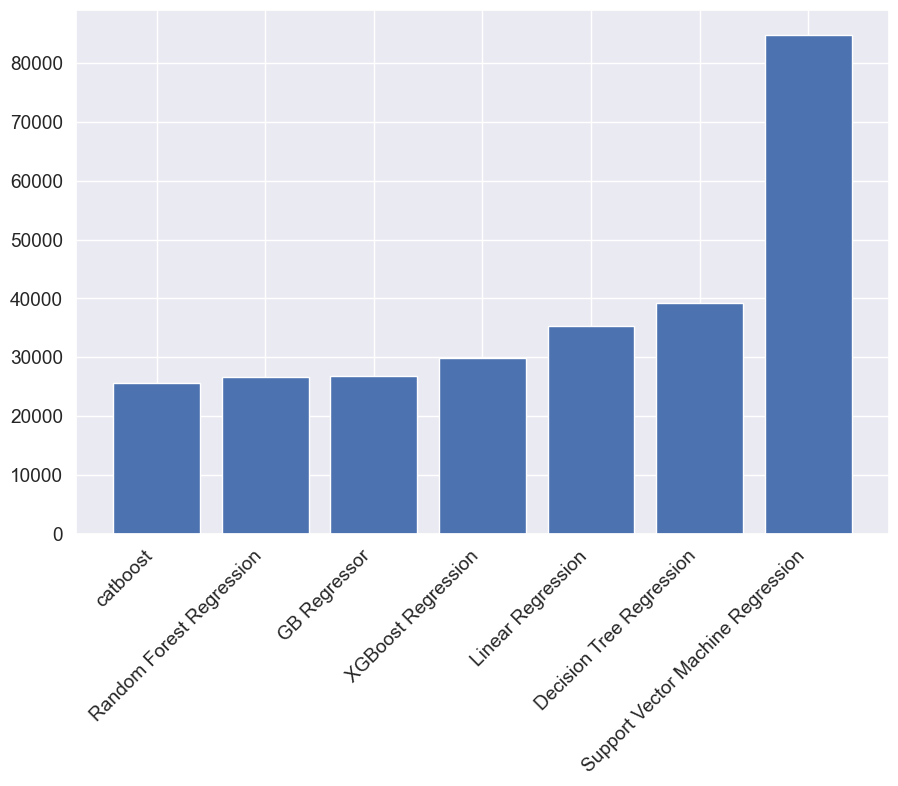

In [71]:
keyss=(rmse_results_sorted.keys())
valuess=(rmse_results_sorted.values())
plt.figure(figsize=(10, 6))
plt.bar(keys,values)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.show()


In [45]:
from sklearn.metrics import r2_score
r2_results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    r2 = r2_score(y_test, predictions)
    r2_results[name] = r2
r2_results_sorted = dict(sorted(r2_results.items(), key=lambda item: item[1], reverse=True))
print(r2_results_sorted)

Learning rate set to 0.041084
0:	learn: 75684.9660856	total: 6.48ms	remaining: 6.47s
1:	learn: 73834.7224500	total: 10.3ms	remaining: 5.15s
2:	learn: 72009.5935340	total: 13.4ms	remaining: 4.46s
3:	learn: 70450.4401203	total: 16.3ms	remaining: 4.05s
4:	learn: 68851.5979306	total: 19.2ms	remaining: 3.83s
5:	learn: 67165.8921725	total: 22.2ms	remaining: 3.68s
6:	learn: 65648.8943080	total: 25.5ms	remaining: 3.61s
7:	learn: 64193.2157704	total: 28.8ms	remaining: 3.57s
8:	learn: 62802.2032958	total: 31.9ms	remaining: 3.51s
9:	learn: 61427.0173440	total: 34.9ms	remaining: 3.45s
10:	learn: 60141.2392944	total: 38ms	remaining: 3.41s
11:	learn: 58864.1731068	total: 41.4ms	remaining: 3.41s
12:	learn: 57699.1870070	total: 44.8ms	remaining: 3.4s
13:	learn: 56582.1364693	total: 47.8ms	remaining: 3.37s
14:	learn: 55441.6083055	total: 51.2ms	remaining: 3.36s
15:	learn: 54356.5953225	total: 54.1ms	remaining: 3.33s
16:	learn: 53247.5461367	total: 57ms	remaining: 3.3s
17:	learn: 52133.1972839	total: 60

183:	learn: 18442.9063327	total: 581ms	remaining: 2.58s
184:	learn: 18395.8798314	total: 585ms	remaining: 2.58s
185:	learn: 18330.7578123	total: 588ms	remaining: 2.57s
186:	learn: 18281.4407450	total: 591ms	remaining: 2.57s
187:	learn: 18236.8193393	total: 594ms	remaining: 2.57s
188:	learn: 18208.9469989	total: 598ms	remaining: 2.56s
189:	learn: 18158.3935487	total: 601ms	remaining: 2.56s
190:	learn: 18121.5836161	total: 605ms	remaining: 2.56s
191:	learn: 18058.5519350	total: 609ms	remaining: 2.56s
192:	learn: 18040.9209915	total: 614ms	remaining: 2.57s
193:	learn: 18003.7496262	total: 617ms	remaining: 2.56s
194:	learn: 17974.0361319	total: 621ms	remaining: 2.56s
195:	learn: 17931.9238493	total: 624ms	remaining: 2.56s
196:	learn: 17908.1716982	total: 627ms	remaining: 2.55s
197:	learn: 17884.9098299	total: 629ms	remaining: 2.55s
198:	learn: 17842.5058284	total: 632ms	remaining: 2.54s
199:	learn: 17781.2250534	total: 635ms	remaining: 2.54s
200:	learn: 17745.6938647	total: 638ms	remaining

369:	learn: 13079.3615374	total: 1.17s	remaining: 1.99s
370:	learn: 13057.5479629	total: 1.17s	remaining: 1.99s
371:	learn: 13032.3602000	total: 1.17s	remaining: 1.98s
372:	learn: 13011.4300269	total: 1.18s	remaining: 1.98s
373:	learn: 12981.4631141	total: 1.18s	remaining: 1.98s
374:	learn: 12966.8604262	total: 1.18s	remaining: 1.97s
375:	learn: 12934.2128259	total: 1.19s	remaining: 1.97s
376:	learn: 12900.7913304	total: 1.19s	remaining: 1.97s
377:	learn: 12874.4965557	total: 1.2s	remaining: 1.97s
378:	learn: 12846.8342938	total: 1.2s	remaining: 1.97s
379:	learn: 12823.9762227	total: 1.2s	remaining: 1.97s
380:	learn: 12799.2824230	total: 1.21s	remaining: 1.96s
381:	learn: 12772.9615657	total: 1.21s	remaining: 1.96s
382:	learn: 12749.7055737	total: 1.21s	remaining: 1.95s
383:	learn: 12717.4438043	total: 1.22s	remaining: 1.95s
384:	learn: 12704.7226181	total: 1.22s	remaining: 1.95s
385:	learn: 12684.5502470	total: 1.22s	remaining: 1.94s
386:	learn: 12662.5598659	total: 1.23s	remaining: 1

562:	learn: 9610.0626236	total: 1.77s	remaining: 1.38s
563:	learn: 9591.4353633	total: 1.78s	remaining: 1.37s
564:	learn: 9578.3571700	total: 1.78s	remaining: 1.37s
565:	learn: 9577.2282553	total: 1.78s	remaining: 1.37s
566:	learn: 9561.1757488	total: 1.79s	remaining: 1.36s
567:	learn: 9543.5631394	total: 1.79s	remaining: 1.36s
568:	learn: 9534.3200898	total: 1.79s	remaining: 1.36s
569:	learn: 9519.1409175	total: 1.8s	remaining: 1.35s
570:	learn: 9512.2613023	total: 1.8s	remaining: 1.35s
571:	learn: 9492.1405425	total: 1.8s	remaining: 1.35s
572:	learn: 9483.6022519	total: 1.81s	remaining: 1.35s
573:	learn: 9463.5729026	total: 1.81s	remaining: 1.34s
574:	learn: 9450.6378058	total: 1.82s	remaining: 1.34s
575:	learn: 9430.7599184	total: 1.82s	remaining: 1.34s
576:	learn: 9413.0198422	total: 1.82s	remaining: 1.34s
577:	learn: 9400.3227202	total: 1.83s	remaining: 1.33s
578:	learn: 9382.5515239	total: 1.83s	remaining: 1.33s
579:	learn: 9374.3759470	total: 1.83s	remaining: 1.33s
580:	learn: 9

747:	learn: 7472.5074619	total: 2.37s	remaining: 798ms
748:	learn: 7459.4935504	total: 2.37s	remaining: 795ms
749:	learn: 7450.2116568	total: 2.38s	remaining: 792ms
750:	learn: 7447.5013840	total: 2.38s	remaining: 789ms
751:	learn: 7439.0294530	total: 2.38s	remaining: 785ms
752:	learn: 7427.6319317	total: 2.38s	remaining: 782ms
753:	learn: 7416.5418147	total: 2.39s	remaining: 779ms
754:	learn: 7407.2025226	total: 2.39s	remaining: 776ms
755:	learn: 7405.1771127	total: 2.4s	remaining: 774ms
756:	learn: 7404.7457760	total: 2.4s	remaining: 771ms
757:	learn: 7394.9148007	total: 2.41s	remaining: 769ms
758:	learn: 7391.1774600	total: 2.41s	remaining: 766ms
759:	learn: 7376.0828855	total: 2.42s	remaining: 763ms
760:	learn: 7375.3549082	total: 2.42s	remaining: 760ms
761:	learn: 7362.0861928	total: 2.42s	remaining: 757ms
762:	learn: 7358.1487747	total: 2.43s	remaining: 754ms
763:	learn: 7357.6833353	total: 2.43s	remaining: 751ms
764:	learn: 7348.5976620	total: 2.43s	remaining: 748ms
765:	learn: 

914:	learn: 6082.3167395	total: 2.92s	remaining: 271ms
915:	learn: 6076.0316532	total: 2.92s	remaining: 268ms
916:	learn: 6073.3418418	total: 2.92s	remaining: 265ms
917:	learn: 6070.2545158	total: 2.93s	remaining: 261ms
918:	learn: 6061.2850162	total: 2.93s	remaining: 258ms
919:	learn: 6054.6629639	total: 2.93s	remaining: 255ms
920:	learn: 6049.7876031	total: 2.94s	remaining: 252ms
921:	learn: 6040.9387776	total: 2.94s	remaining: 249ms
922:	learn: 6037.7017546	total: 2.94s	remaining: 246ms
923:	learn: 6027.6713721	total: 2.95s	remaining: 243ms
924:	learn: 6020.5241500	total: 2.95s	remaining: 239ms
925:	learn: 6020.1256285	total: 2.96s	remaining: 236ms
926:	learn: 6015.6268934	total: 2.96s	remaining: 233ms
927:	learn: 6010.8527576	total: 2.96s	remaining: 230ms
928:	learn: 5998.4908967	total: 2.97s	remaining: 227ms
929:	learn: 5989.5016789	total: 2.97s	remaining: 224ms
930:	learn: 5989.1379577	total: 2.98s	remaining: 221ms
931:	learn: 5980.8971832	total: 2.98s	remaining: 217ms
932:	learn

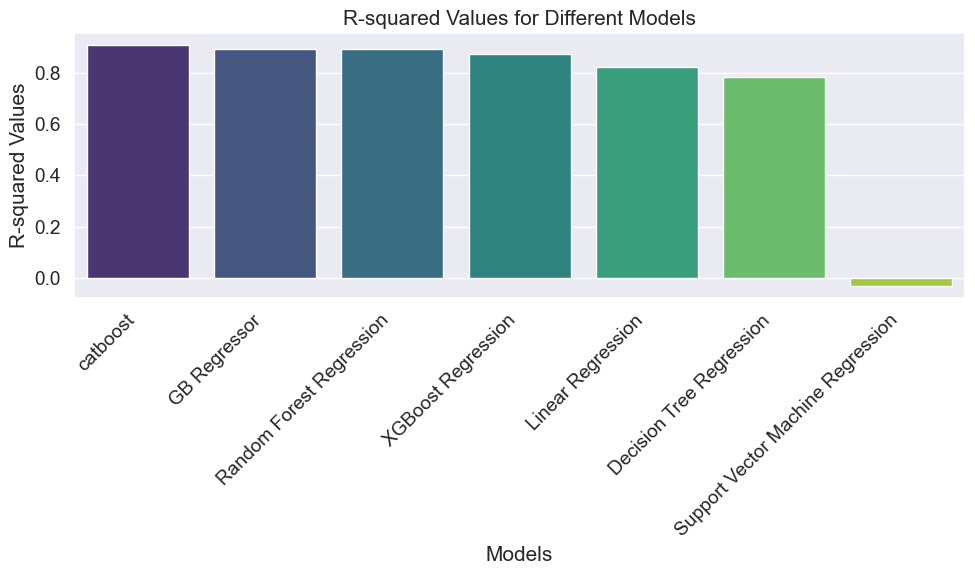

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
r2_results_sorted={'catboost': 0.9060572595204457, 'GB Regressor': 0.8932591944922633, 'Random Forest Regression': 0.8923199026944706, 'XGBoost Regression': 0.8724890227001112, 'Linear Regression': 0.821660396048146, 'Decision Tree Regression': 0.7839857493999993, 'Support Vector Machine Regression': -0.03146535047338839}
import seaborn as sns
# Convert dictionary to a Pandas DataFrame
import pandas as pd

df = pd.DataFrame(list(r2_results_sorted.items()), columns=['Model', 'R-squared'])

# Sort DataFrame by R-squared values
#df = df.sort_values(by='R-squared', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=df, palette='viridis')
plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('R-squared Values for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [47]:
catboost_model=CatBoostRegressor()
catboost_model.fit(x_train, y_train)

# Predict the test data using the trained model
y_pred = catboost_model.predict(x_test)

Learning rate set to 0.041084
0:	learn: 75675.9191533	total: 9.05ms	remaining: 9.04s
1:	learn: 73666.1138367	total: 15ms	remaining: 7.49s
2:	learn: 71912.2901728	total: 20.7ms	remaining: 6.87s
3:	learn: 70198.9477895	total: 25.5ms	remaining: 6.34s
4:	learn: 68547.2483793	total: 31ms	remaining: 6.17s
5:	learn: 66900.5781752	total: 36.7ms	remaining: 6.08s
6:	learn: 65270.3403648	total: 42.1ms	remaining: 5.97s
7:	learn: 63799.0421339	total: 47.3ms	remaining: 5.87s
8:	learn: 62288.2814260	total: 52.5ms	remaining: 5.78s
9:	learn: 60866.0274946	total: 57.6ms	remaining: 5.71s
10:	learn: 59560.3479284	total: 63.3ms	remaining: 5.69s
11:	learn: 58251.0699757	total: 68.5ms	remaining: 5.64s
12:	learn: 57056.2097434	total: 73.2ms	remaining: 5.56s
13:	learn: 55877.4741359	total: 78ms	remaining: 5.5s
14:	learn: 54876.3269080	total: 82.9ms	remaining: 5.44s
15:	learn: 53889.7626833	total: 87.5ms	remaining: 5.38s
16:	learn: 52830.4537515	total: 92.1ms	remaining: 5.33s
17:	learn: 51877.0794790	total: 94.

162:	learn: 18429.1155719	total: 813ms	remaining: 4.17s
163:	learn: 18402.7050658	total: 818ms	remaining: 4.17s
164:	learn: 18372.7572779	total: 823ms	remaining: 4.17s
165:	learn: 18298.0162780	total: 829ms	remaining: 4.17s
166:	learn: 18239.9442755	total: 835ms	remaining: 4.16s
167:	learn: 18208.8548658	total: 840ms	remaining: 4.16s
168:	learn: 18169.5211172	total: 846ms	remaining: 4.16s
169:	learn: 18116.9868236	total: 852ms	remaining: 4.16s
170:	learn: 18051.6595397	total: 857ms	remaining: 4.15s
171:	learn: 18033.3397003	total: 862ms	remaining: 4.15s
172:	learn: 18015.8213539	total: 866ms	remaining: 4.14s
173:	learn: 17994.0324718	total: 871ms	remaining: 4.14s
174:	learn: 17912.3235565	total: 876ms	remaining: 4.13s
175:	learn: 17860.9214747	total: 880ms	remaining: 4.12s
176:	learn: 17836.9014790	total: 885ms	remaining: 4.11s
177:	learn: 17819.8454609	total: 890ms	remaining: 4.11s
178:	learn: 17796.1104142	total: 896ms	remaining: 4.11s
179:	learn: 17745.3338855	total: 901ms	remaining

313:	learn: 13527.6764512	total: 1.61s	remaining: 3.52s
314:	learn: 13510.9665865	total: 1.62s	remaining: 3.52s
315:	learn: 13483.3218532	total: 1.63s	remaining: 3.52s
316:	learn: 13458.4596299	total: 1.63s	remaining: 3.52s
317:	learn: 13440.0326997	total: 1.64s	remaining: 3.51s
318:	learn: 13415.9543425	total: 1.64s	remaining: 3.51s
319:	learn: 13392.5273207	total: 1.65s	remaining: 3.5s
320:	learn: 13383.5589561	total: 1.66s	remaining: 3.5s
321:	learn: 13359.9361295	total: 1.66s	remaining: 3.5s
322:	learn: 13341.6485542	total: 1.67s	remaining: 3.5s
323:	learn: 13332.8966954	total: 1.68s	remaining: 3.5s
324:	learn: 13315.7494514	total: 1.68s	remaining: 3.5s
325:	learn: 13294.5919886	total: 1.69s	remaining: 3.5s
326:	learn: 13268.9059756	total: 1.7s	remaining: 3.5s
327:	learn: 13240.9313167	total: 1.71s	remaining: 3.5s
328:	learn: 13208.4215906	total: 1.71s	remaining: 3.5s
329:	learn: 13172.2262140	total: 1.72s	remaining: 3.5s
330:	learn: 13153.5101682	total: 1.73s	remaining: 3.49s
331:

487:	learn: 10006.3746636	total: 2.6s	remaining: 2.73s
488:	learn: 9997.2682864	total: 2.61s	remaining: 2.73s
489:	learn: 9971.6352555	total: 2.62s	remaining: 2.72s
490:	learn: 9955.4023264	total: 2.62s	remaining: 2.72s
491:	learn: 9936.9302535	total: 2.63s	remaining: 2.71s
492:	learn: 9919.0836455	total: 2.63s	remaining: 2.71s
493:	learn: 9901.5397979	total: 2.64s	remaining: 2.7s
494:	learn: 9884.5891055	total: 2.64s	remaining: 2.69s
495:	learn: 9870.0233969	total: 2.65s	remaining: 2.69s
496:	learn: 9856.6638958	total: 2.65s	remaining: 2.69s
497:	learn: 9846.5648831	total: 2.66s	remaining: 2.68s
498:	learn: 9820.2383744	total: 2.66s	remaining: 2.67s
499:	learn: 9807.4002749	total: 2.67s	remaining: 2.67s
500:	learn: 9804.6585437	total: 2.67s	remaining: 2.66s
501:	learn: 9790.7039229	total: 2.68s	remaining: 2.66s
502:	learn: 9777.5434235	total: 2.68s	remaining: 2.65s
503:	learn: 9767.0272185	total: 2.69s	remaining: 2.64s
504:	learn: 9757.6170155	total: 2.69s	remaining: 2.64s
505:	learn:

643:	learn: 7929.5209024	total: 3.42s	remaining: 1.89s
644:	learn: 7912.0875168	total: 3.42s	remaining: 1.88s
645:	learn: 7908.1165130	total: 3.43s	remaining: 1.88s
646:	learn: 7897.0127143	total: 3.43s	remaining: 1.87s
647:	learn: 7884.1730522	total: 3.44s	remaining: 1.87s
648:	learn: 7876.4397655	total: 3.44s	remaining: 1.86s
649:	learn: 7869.9954236	total: 3.45s	remaining: 1.86s
650:	learn: 7856.4875973	total: 3.46s	remaining: 1.85s
651:	learn: 7854.4168227	total: 3.46s	remaining: 1.85s
652:	learn: 7849.5503369	total: 3.46s	remaining: 1.84s
653:	learn: 7838.6740295	total: 3.47s	remaining: 1.83s
654:	learn: 7821.5076810	total: 3.47s	remaining: 1.83s
655:	learn: 7806.5431938	total: 3.48s	remaining: 1.82s
656:	learn: 7804.5558017	total: 3.48s	remaining: 1.82s
657:	learn: 7793.7326613	total: 3.49s	remaining: 1.81s
658:	learn: 7779.5610708	total: 3.49s	remaining: 1.81s
659:	learn: 7764.7292637	total: 3.5s	remaining: 1.8s
660:	learn: 7752.6925486	total: 3.5s	remaining: 1.79s
661:	learn: 7

798:	learn: 6367.4974346	total: 4.25s	remaining: 1.07s
799:	learn: 6359.5686176	total: 4.26s	remaining: 1.06s
800:	learn: 6341.6650347	total: 4.26s	remaining: 1.06s
801:	learn: 6340.6641269	total: 4.27s	remaining: 1.05s
802:	learn: 6334.1815005	total: 4.27s	remaining: 1.05s
803:	learn: 6321.4833921	total: 4.28s	remaining: 1.04s
804:	learn: 6312.7913865	total: 4.29s	remaining: 1.04s
805:	learn: 6302.8040312	total: 4.29s	remaining: 1.03s
806:	learn: 6296.4144389	total: 4.29s	remaining: 1.03s
807:	learn: 6281.8065078	total: 4.3s	remaining: 1.02s
808:	learn: 6277.0719091	total: 4.3s	remaining: 1.02s
809:	learn: 6262.5161564	total: 4.31s	remaining: 1.01s
810:	learn: 6261.3617553	total: 4.31s	remaining: 1s
811:	learn: 6250.5743517	total: 4.32s	remaining: 1s
812:	learn: 6242.9478574	total: 4.32s	remaining: 995ms
813:	learn: 6237.2656893	total: 4.33s	remaining: 989ms
814:	learn: 6236.5375214	total: 4.33s	remaining: 984ms
815:	learn: 6226.1537652	total: 4.34s	remaining: 979ms
816:	learn: 6215.8

957:	learn: 5129.6677239	total: 5.04s	remaining: 221ms
958:	learn: 5121.3052340	total: 5.05s	remaining: 216ms
959:	learn: 5109.8445402	total: 5.05s	remaining: 211ms
960:	learn: 5104.2575411	total: 5.06s	remaining: 205ms
961:	learn: 5095.1614254	total: 5.07s	remaining: 200ms
962:	learn: 5091.7780742	total: 5.07s	remaining: 195ms
963:	learn: 5086.9876710	total: 5.08s	remaining: 190ms
964:	learn: 5084.5582776	total: 5.08s	remaining: 184ms
965:	learn: 5083.6226258	total: 5.09s	remaining: 179ms
966:	learn: 5073.2749291	total: 5.09s	remaining: 174ms
967:	learn: 5064.9162755	total: 5.09s	remaining: 168ms
968:	learn: 5060.6563912	total: 5.1s	remaining: 163ms
969:	learn: 5052.2247066	total: 5.1s	remaining: 158ms
970:	learn: 5044.6235074	total: 5.11s	remaining: 153ms
971:	learn: 5040.8706424	total: 5.11s	remaining: 147ms
972:	learn: 5040.4346577	total: 5.12s	remaining: 142ms
973:	learn: 5033.3915902	total: 5.12s	remaining: 137ms
974:	learn: 5025.8012198	total: 5.13s	remaining: 131ms
975:	learn: 